In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [171]:
df = pd.read_csv('desktop/raw_fighter_details.csv')

In [181]:
df.head(4)

,fighter_name,height(feet),weight(lbs),reach(inches),Stance,DOB,Age
10,Aaron Phillips,5.750000,135,70,Southpaw,1989-08-05,30
11,Aaron Riley,5.666667,155,69,Southpaw,1980-12-09,39
12,Aaron Rosa,6.333333,205,78,Orthodox,1983-05-28,36
13,Aaron Simpson,6.000000,170,73,Orthodox,1974-07-20,45


In [173]:
df["Reach"] = df["Reach"].str.strip('\"')

In [174]:
df["Weight"] = df["Weight"].str.strip('\"lbs.')

In [175]:
df[["Weight", "Reach"]] = df[["Weight", "Reach"]].apply(pd.to_numeric)

In [176]:
def parse_ht(ht):
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    in_divided = in_/12
    return (ft_) + in_divided


df["Height"] = df["Height"].apply(lambda x:parse_ht(x))

In [177]:
df.rename(columns = {'Reach' : 'reach(inches)', 'Weight' : 'weight(lbs)', 'Height' : 'height(feet)'}, inplace = True)

In [178]:
df['DOB'] = pd.to_datetime(df['DOB'], infer_datetime_format = True )
now = pd.to_datetime('now')

In [179]:
df['Age'] = (now - df['DOB']).astype('<m8[Y]')
df['Age'] = df['Age'].astype(int)

<function matplotlib.pyplot.show(*args, **kw)>

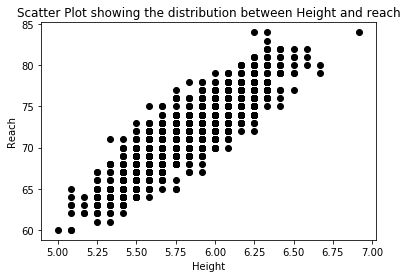

In [188]:
plt.scatter(x = df["height(feet)"], y = df["reach(inches)"], color = "black")
plt.title("Scatter Plot showing the distribution between Height and reach")
plt.xlabel("Height")
plt.ylabel("Reach")
plt.show

Thus we can see clearly from the scatter plot above that there is a linear relationship between Height and Reach and there is just a few outliers

In [193]:
pearsonCorr =  df.corr(method = "pearson")

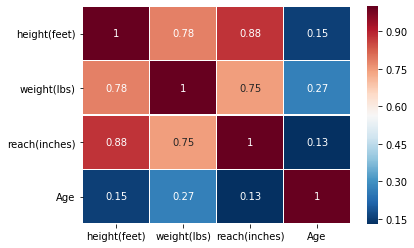

In [195]:
sb.heatmap(pearsonCorr, 
            xticklabels=pearsonCorr.columns,
            yticklabels=pearsonCorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

From the heatmap above we can get good insight on the features. The heighest correlation is between the height and the reach, while the lowewst is between the reach and the age

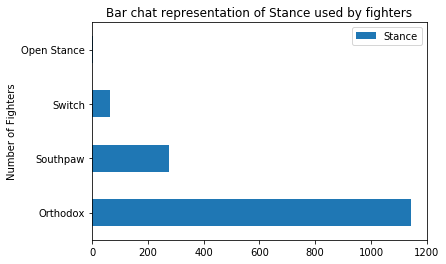

In [214]:
df_stance = pd.DataFrame(df['Stance'].value_counts())
df_stance.plot(kind = 'barh')

plt.title('Bar chat representation of Stance used by fighters')
plt.ylabel('Number of Fighters')


plt.show()

It is clear from the bar chart above that Orthodox had the hightest Stance and Open Stance was the least

Text(0.5, 1.0, 'Box plot showing the distribution of the Ages of the fighters')

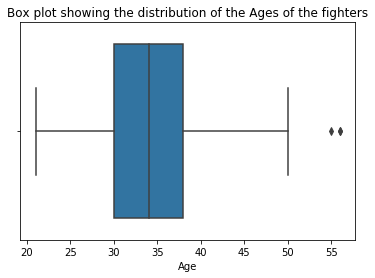

In [247]:
sb.boxplot(x=df["Age"])
plt.title("Box plot showing the distribution of the Ages of the fighters")

Text(0.5, 1.0, 'Violin plot showing the distribution of the weights of the fighters')

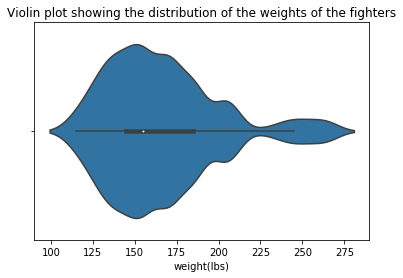

In [242]:
sb.violinplot(x=df["weight(lbs)"])
plt.title("Violin plot showing the distribution of the weights of the fighters")

From the Violin Plot above we can see the where the median weight lies, and we can see that there also some outliers

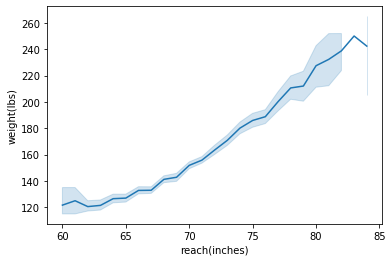

In [228]:
sb.lineplot(x = df["reach(inches)"], y=df["weight(lbs)"])

From the line plot above we can see clearly that there's a linear relationship between the weight of the fighters and their reach, and just a few outliers

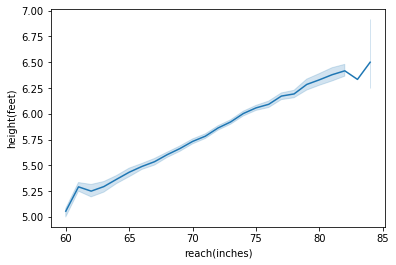

In [229]:
sb.lineplot(x = df["reach(inches)"], y=df["height(feet)"])

From the line plot above we can see clearly that there's a linear relationship between the height of the fighters and their reach, and just a few outliers

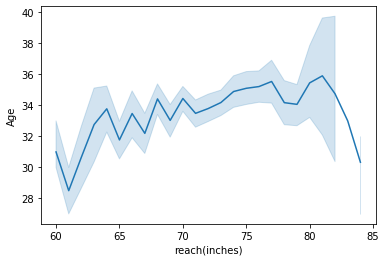

In [236]:
sb.lineplot(x = df["reach(inches)"], y=df["Age"])

We can see clearly that there's no linear relationship between the Age of the fighters and their Reach. This is the just the affirmationof the earlier plotted pearson Heatmap that gave only a 0.13 value. Infact the age seems the most useless feature there since its correlation value with any other feature is always les than 0.3. So there was realy no point of creating the feature in the first place ? yeah you are right no need. 

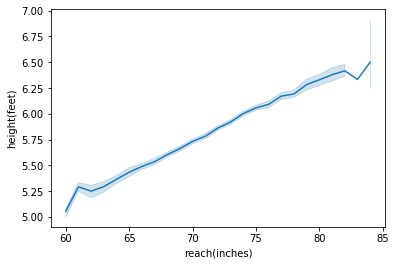

In [248]:
sb.lineplot(x = df["reach(inches)"], y=df["height(feet)"])

Yeah lastly this also shows that there's a good linear relationship between the Height and weight of fighters